In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt
import umap
import seaborn as sns


In [30]:
#Load the data

X_train = pd.read_csv("../data/X_train.csv")
y_train = pd.read_csv("../data/y_train.csv")

In [ ]:
#Scale data and remove NaNs
X_scaled = StandardScaler().fit_transform(X_train)

# Impute NaNs in X_scaled using column means
if np.isnan(X_scaled).any():
    imputer = SimpleImputer(strategy='mean')
    X_scaled_imputed = imputer.fit_transform(X_scaled)
else:
    X_scaled_imputed = X_scaled

In [32]:
#PCA and UMAP in 2D

# Prepare labels for coloring and hover
labels = y_train["characteristics_ch1"] if "characteristics_ch1" in y_train.columns else y_train.squeeze()

# PCA interactive plot
pca = PCA(n_components=2)

pca_result = pca.fit_transform(X_scaled_imputed)
pca_df = pd.DataFrame({
    "PC1": pca_result[:, 0],
    "PC2": pca_result[:, 1],
    "Label": labels
})
fig_pca = px.scatter(pca_df, x="PC1", y="PC2", color="Label", hover_name="Label", title="Interactive PCA")
fig_pca.show()

In [33]:
# UMAP interactive plot

reducer = umap.UMAP(n_components=2)
umap_result = reducer.fit_transform(X_scaled_imputed)
umap_df = pd.DataFrame({
    "UMAP1": umap_result[:, 0],
    "UMAP2": umap_result[:, 1],
    "Label": labels
})
fig_umap = px.scatter(umap_df, x="UMAP1", y="UMAP2", color="Label", hover_name="Label", title="Interactive UMAP")
fig_umap.show()

In [34]:
#PCA and UMAP in 3D

# Prepare labels for coloring and hover
labels = y_train["characteristics_ch1"] if "characteristics_ch1" in y_train.columns else y_train.squeeze()

# PCA interactive 3D plot
pca = PCA(n_components=3)

pca_result = pca.fit_transform(X_scaled_imputed)
pca_df = pd.DataFrame({
    "PC1": pca_result[:, 0],
    "PC2": pca_result[:, 1],
    "PC3": pca_result[:, 2],
    "Label": labels
})
fig_pca = px.scatter_3d(pca_df, x="PC1", y="PC2", z="PC3", color="Label", hover_name="Label", title="Interactive  3D PCA")
fig_pca.show()

In [35]:
# UMAP interactive 3D plot
reducer = umap.UMAP(n_components=3)

umap_result = reducer.fit_transform(X_scaled_imputed)

umap_df = pd.DataFrame({
    "UMAP1": umap_result[:, 0],
    "UMAP2": umap_result[:, 1],
    "UMAP3": umap_result[:, 2],
    "Label": labels
})
fig_umap = px.scatter_3d(umap_df, x="UMAP1", y="UMAP2", z="UMAP3", color="Label", hover_name="Label", title="Interactive 3D UMAP")
fig_umap.show()

[0.27413801 0.38148787 0.4627942  0.50719628 0.54151568 0.57329144
 0.5974266  0.61956716 0.64122162 0.65857281 0.67536832 0.69141439
 0.70639125 0.71953494 0.73212399 0.74435952 0.75546746 0.76551231
 0.77546844 0.78534672 0.79495376 0.80385751 0.81233448 0.82038363
 0.82834698 0.8357743  0.84272896 0.84953037 0.8560915  0.86228144
 0.86839957 0.87417965 0.87988458 0.88546819 0.89079563 0.89591595
 0.90078637 0.90564501 0.91019012 0.91460931 0.91870449 0.92273379
 0.92635295 0.92991285 0.93346814 0.93680408 0.9400576  0.94316011
 0.94607118 0.94895365 0.95163297 0.95426292 0.95679117 0.9591929
 0.96143099 0.96363532 0.96575154 0.96780407 0.96968852 0.9714981
 0.97327702 0.97490018 0.97650622 0.97805553 0.97950376 0.98085594
 0.98218285 0.98339045 0.98451368 0.98552936 0.98650355 0.98745411
 0.98839273 0.98924903 0.99009431 0.99089404 0.99167116 0.99232919
 0.99294529 0.99353132 0.99409133 0.9946071  0.99508903 0.99552713
 0.99594777 0.99634102 0.99671801 0.9970715  0.99739784 0.997692

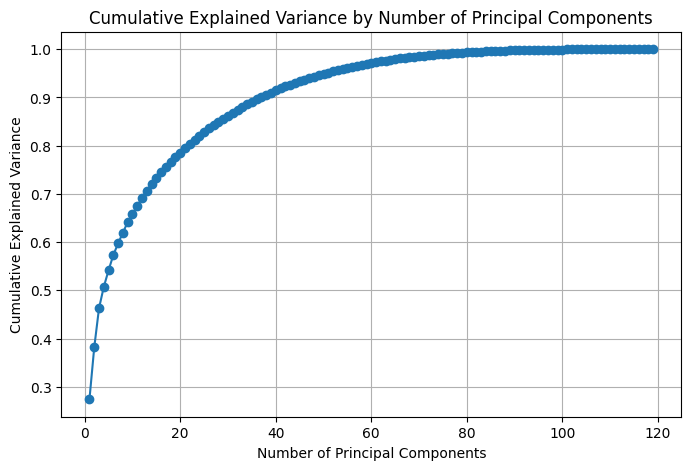

In [36]:
# Find the number of principal components needed to reach 90% cumulative explained variance
pca = PCA()
pca.fit(X_scaled_imputed)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print(cumulative_variance)

threshold = 0.7
num_components_90 = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of principal components to reach 90% cumulative explained variance: {num_components_90}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

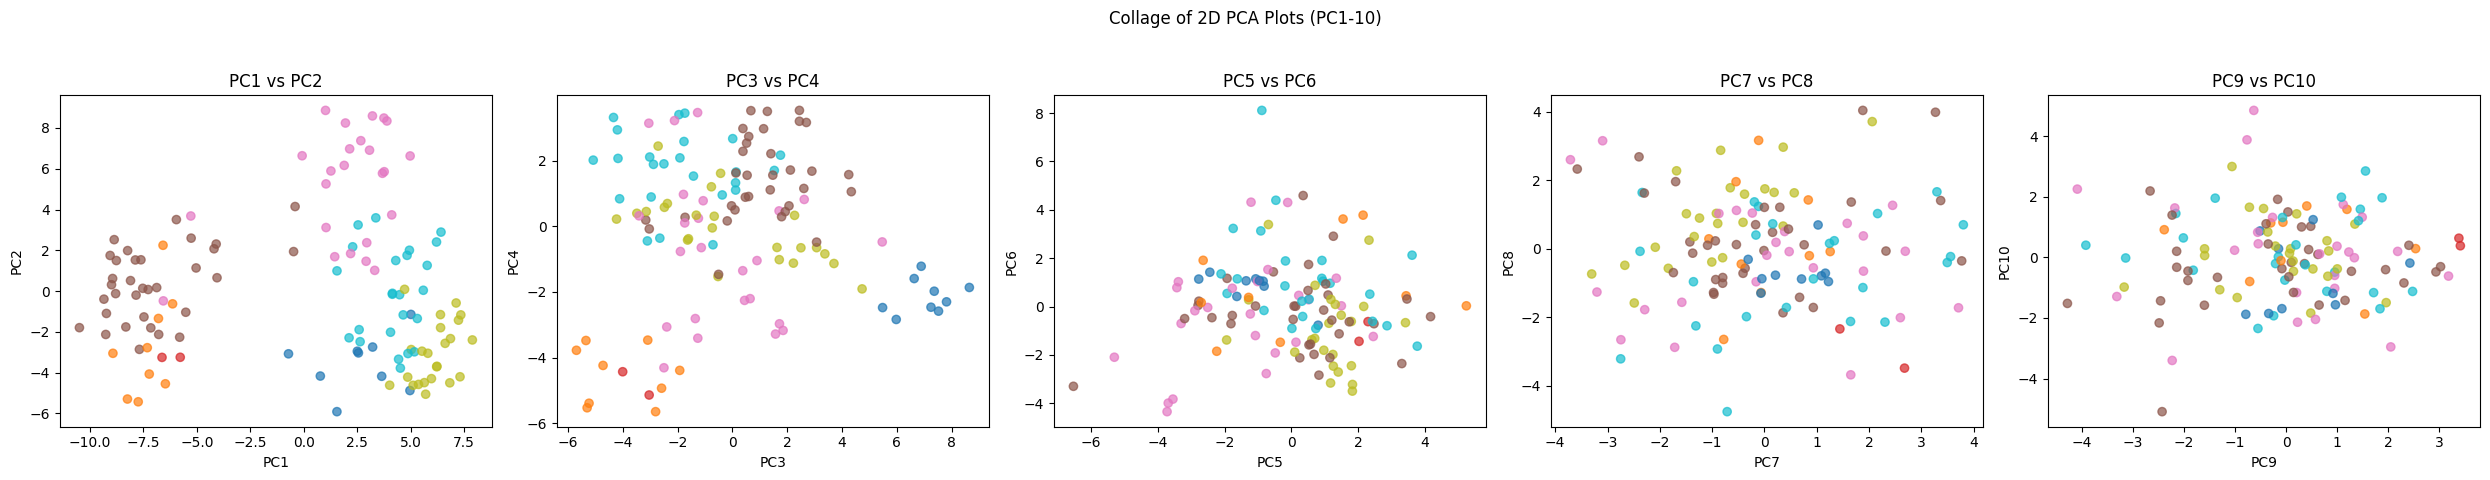

In [37]:
# PCA and UMAP: Collage of 2D PCA plots for first 10 components
pca = PCA(n_components=10)

pca_result = pca.fit_transform(X_scaled_imputed)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    ax = axes[i]
    pc_x = i * 2
    pc_y = i * 2 + 1
    ax.scatter(pca_result[:, pc_x], pca_result[:, pc_y], c=labels, cmap='tab10', alpha=0.7)
    ax.set_xlabel(f'PC{pc_x+1}')
    ax.set_ylabel(f'PC{pc_y+1}')
    ax.set_title(f'PC{pc_x+1} vs PC{pc_y+1}')
plt.suptitle('Collage of 2D PCA Plots (PC1-10)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

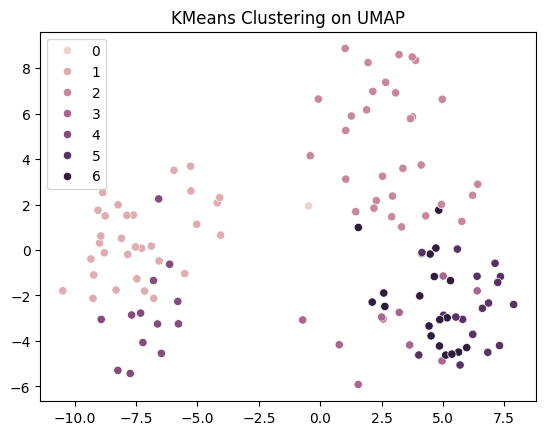

In [38]:
#Identify groups not based on the labels
kmeans = KMeans(n_clusters=7)
labels = kmeans.fit_predict(X_scaled_imputed)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=labels)
plt.title("KMeans Clustering on UMAP")
plt.show()